In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goalzone-fitness-data/ASDS_DatacampFinal_fitness_class_2212_07.13.2023 - fitness_class_2212.csv
/kaggle/input/image-dataproject-information/ASDS_DataProject_inforamtion.png


**Introduction**
The purpose of examining this dataset is to determine what supervised learning model woudl be best for predicting on attendance vs non-attendace rates at Goalzone gym

**Company Background:**
GoalZone is a fitness club chain in Canada.
GoalZone offers a range of fitness classes in two capacities - 25 and 15.
Some classes are always fully booked. Fully booked classes often have a low attendance rate.
GoalZone wants to increase the number of spaces available for classes.
They want to do this by predicting whether the member will attend the class or not.
If they can predict a member will not attend the class, they can make another space
available

In [2]:
from IPython.display import Image
import os
!ls ../input//kaggle/input/image-dataproject-information/ASDS_DataProject_inforamtion.png

ls: cannot access '../input//kaggle/input/image-dataproject-information/ASDS_DataProject_inforamtion.png': No such file or directory


Below shows the instructions given from the project as to how to creat consistency in the dataset and we execute data manipulation.


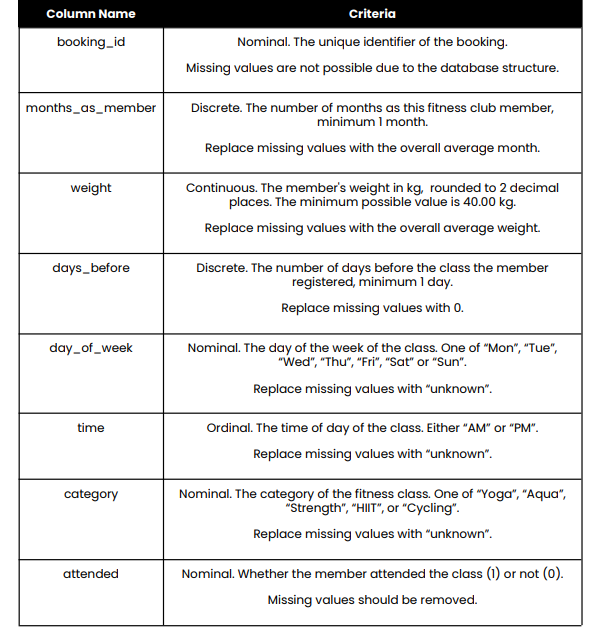

In [3]:
#Data- The table describes how handle the data in each column

Image("/kaggle/input/image-dataproject-information/ASDS_DataProject_inforamtion.png")

**Tasks & Company Questions:**
Write your answers in your workspace.
1. For every column in the data:
    a. State whether the values match the description given in the table above.
    b. State the number of missing values in the column.
    c. Describe what you did to make values match the description if they did not match.

2. Create a visualization that shows how many bookings attended the class. Use the
visualization to:
a. State which category of the variable attended has the most observations
b. Explain whether the observations are balanced across categories of the
variable attended

3. Describe the distribution of the number of months as a member. Your answer must
include a visualization that shows the distribution.

4. Describe the relationship between attendance and number of months as a member.
Your answer must include a visualization to demonstrate the relationship.

5. The business wants to predict whether members will attend using the data provided.
State the type of machine learning problem that this is (regression/ classification/
clustering).

6. Fit a baseline model to predict whether members will attend using the data provided.
You must include your code.

7. Fit a comparison model to predict whether members will attend using the data
provided. You must include your code.

8. Explain why you chose the two models used in parts 6 and 7.

9. Compare the performance of the two models used in parts 6 and 7, using any method
suitable. You must include your code.

10. Explain which model performs better and why

**Business question 1**
1. For every column in the data:
a. State whether the values match the description given in the table above.
b. State the number of missing values in the column.
c. Describe what you did to make values match the description if they did not
match.

**Loading the necessary libraries and files to begin analysis on the dataset. We will print and view the first 5 rows of the dataset.**

In [4]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read data
df = pd.read_csv('/kaggle/input/goalzone-fitness-data/ASDS_DatacampFinal_fitness_class_2212_07.13.2023 - fitness_class_2212.csv')

#Print the number of rows and columns using shape
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

#Quick view of the fist 5 rows of the dataset
df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Number of rows: 1500
Number of columns: 8


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


**Data Validation** The following scripts will address all parts to question one. At the end a summary report will be provided for the question.


In [5]:
#Looking at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [6]:
columns= list(df.columns)
print(columns)

['booking_id', 'months_as_member', 'weight', 'days_before', 'day_of_week', 'time', 'category', 'attended']



We will perform data validation to answer these questions from the assignment:
1. For every column in the data:
    a. State whether the values match the description given in the table above.
    b. State the number of missing values in the column.
    c. Describe what you did to make values match the description if they did not match.

In [7]:
#Let's validate that the category column fits into the categories from the data description in the 
#correspondence

#Value counts of the categories & weekdays
category_counts= df['category'].value_counts()
weekday_counts= df['day_of_week'].value_counts()

#Print results
print("Value Counts:", category_counts)
print("Value Counts:", weekday_counts)


Value Counts: HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64
Value Counts: Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64


In [8]:
#Replacing the string to an NaN value to help removing the missing values
df['category']= df['category'].replace('-', 'Unknown')

#Checking the missing data in the category column
print("This is the number of missing data:", df['category'].isna().sum())

#Confirming value counts of the cateogry columns
print("This is the number of values per category:", df['category'].value_counts())

This is the number of missing data: 0
This is the number of values per category: HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
Unknown      13
Name: category, dtype: int64


In [9]:
#Function to convert the naming conventions of the days of the week
def combine_weekdays(df, day_of_week):
    df['day_of_week']= df['day_of_week'].str.replace('Monday', 'Mon')
    df['day_of_week']= df['day_of_week'].str.replace('Wednesday', 'Wed')
    df['day_of_week']= df['day_of_week'].str.replace('Fri.', 'Fri')
    return df

df = combine_weekdays(df, 'day of the week')

#Print results
print(df['day_of_week'].value_counts())



Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64


/tmp/ipykernel_20/517461217.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['day_of_week']= df['day_of_week'].str.replace('Fri.', 'Fri')


**Category column results:** The category counts are validated to be: HIIT, Cycling, Strength, Yoga & Aqua as described in the data description from the correspondence. The category columns contains 13 missing values represented by a '-', we will first replace the '-' with a "Unknown" value as a place holder. After our manipulation we will use the value counts method to confirm the changes made.

**Day_of_week results: *******The naming conventions within the column is not homogenic. For example, there value for the first day of the week is stored 'Monday' & 'Mon'. They represent the same day but the way the the data was recorded in the table is split the vlues counts into two different categories. We will replace these day_of_the_week with the abbrivated version of the day, example, 'Wednesday" will be converted to 'Wed' to acheive consistency in the data. This will produce more reliable & consistent results.*******

**See the below code for the steps taken to execute the task**

In [10]:
#Check missing data in all the columns
df.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

There are 20 missing values in the weight column. To preserve data and use as many data points as  possible in our analysis, we will impute the average weight to the missing values. See code below:

In [11]:
#Finding the overall mean of the weight column
weight_mean = df['weight'].mean()

#Imputing the mean to the missing values in the weight column
df['weight'].fillna(weight_mean, inplace= True)

#Looking for missing values in the weight column
df.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

The following two code blocks validates for unique indentifiers in the 'booking_id' column


In [12]:
unique_id= df['booking_id'].nunique()
print("Number of unique values:", unique_id)

Number of unique values: 1500


In [13]:
duplicates= df['booking_id'].duplicated()

# Filter the DataFrame to show rows with duplicates in 'Column1'
duplicated_rows = df[duplicates]

print("Duplicate rows:")
print(duplicated_rows)

Duplicate rows:
Empty DataFrame
Columns: [booking_id, months_as_member, weight, days_before, day_of_week, time, category, attended]
Index: []


The 'days_before' column is a mixture of string and numeric data. We will clean this column by removing the string data and converting the column to numeric data type


In [14]:
#Extract numeric numbers from the days_before column
def extract_numeric(s):
    try:
        return int(s)
    except ValueError:
        return None 
    
#Clean the column
df['days_before']= df['days_before'].apply(extract_numeric)

#Drop rows w/ None
df= df.dropna(subset=['days_before'])

#Convert the 'days_before' to integer dtype
df['days_before']= df['days_before'].astype(int)

print(df)
print(df.dtypes)

      booking_id  months_as_member  weight  days_before day_of_week time  \
0              1                17   79.56            8         Wed   PM   
1              2                10   79.01            2         Mon   AM   
2              3                16   74.53           14         Sun   AM   
3              4                 5   86.12           10         Fri   AM   
4              5                15   69.29            8         Thu   AM   
...          ...               ...     ...          ...         ...  ...   
1495        1496                21   79.51           10         Fri   AM   
1496        1497                29   89.55            2         Mon   AM   
1497        1498                 9   87.38            4         Tue   AM   
1498        1499                34   68.64           14         Sun   AM   
1499        1500                20   94.39            8         Thu   AM   

      category  attended  
0     Strength         0  
1         HIIT         0  
2     

In [15]:
#Looking for abnormal and negative values in the 'days_before' column
min_day= df['days_before'].min()
max_day= df['days_before'].max()

print("Minimum days before the member registered:", min_day)
print("Maximum days before the member registered:", max_day)

Minimum days before the member registered: 1
Maximum days before the member registered: 29


The following cell is intended to ensure that the values in the attended column are accurately recorded as 1 & 0

In [16]:
df['attended'].value_counts()

0    1031
1     444
Name: attended, dtype: int64

In [17]:
#Checking the 'time' column to ensure the data was recorded as 'AM' and 'PM'
time_stamp= df['time'].value_counts()

print("This is the session of the day: ", time_stamp)

This is the session of the day:  AM    1121
PM     354
Name: time, dtype: int64


In [18]:
unique_time= df['time'].unique()
unique_time

array(['PM', 'AM'], dtype=object)

**Summary of question 1**
After our data manipulation the data has been cleaned and is now ready for visualization and building the ML model. To ensure that the data fit the description in the table we executed different data techniques on the columns. The following describes the techniques used on the dataset to clean the data, count and impute the missing values.
* Firstly, the .info() was used to look at the data types of the differetn columns.
* The data was inspected for negative values as such valus could skew the analysis.
* In the 'category' column, we used the value counts method to verify the counts of the different variables in the column. For the missing values in the column, we imputed the string 'unknown' to the missing values. The were 13 missing values in the column and the missing values were stored as '-'. 
* The day_of_week column had the days recorded in different nomenclature. For example, the first day of the week was store as both 'Monday' and 'Mon', this meant the the same day was now double recorded. To rectify this, we wrote a function using the 'str.replace' method to the change full weekday name to its abbreviated version, example, 'Monday' was 'Mon', 'Wednesday' was stored as 'Wed' etc. Friday was stored both as 'Fri.'(note the punctuation) and 'Fri', the same str.replace technique in the function was used to convert the day to its abbreviated form ('Fri').
* Inspected the 'days_before' column to ensure that the minimum value was 1. It would be impossible to have a negative number for a registration date so we want to ensure that there were no negative values in that column.
* The weight column had twenty missing values, these values were imputed by using the overall mean of the column to preserve data in the dataset. The more data we can have in the dataset the nome accuracy we can generate in our model. In addition, the values in the column are a float data type rounded to two decimal places.
* The attended column was inspected to ensure that the values in the column was either 1(attended the class) or 0(did not attend the class). No missing values were found in the column
* No change were made to the 'time' column. Data was recorded accurately in the table
* Strings were stripped from the 'days_before' column and the column was converted to a interger data type

****

**Business question 2**
Create a visualization that shows how many bookings attended the class. Use the
visualization to:
a. State which category of the variable attended has the most observations
b. Explain whether the observations are balanced across categories of the
variable attended

**Data Visualization**

In [19]:
#Viewing the dataset
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


We are going to look at the distribution of attendace within the dataset. We filter the 'attended' column to show only calsses that were attended, i.e that the variable in the attended column was equal to 1

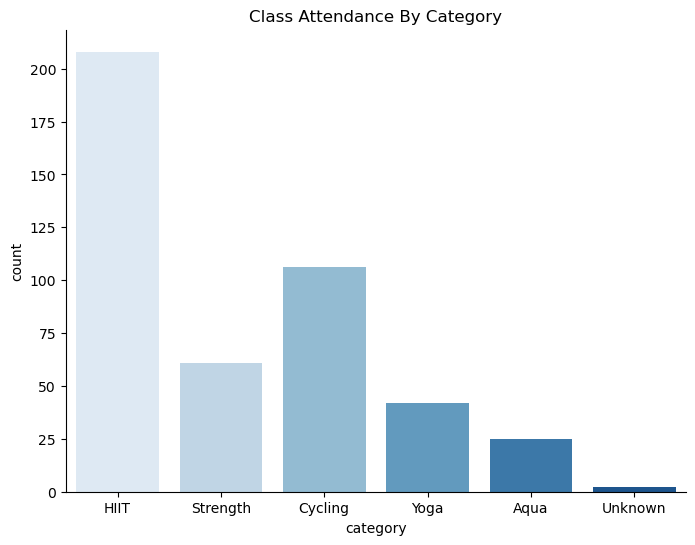

In [20]:
#Filter the dataset to classes with attendance
attendance= df[df['attended'] == 1]

#Create a countplot of class attendance by category
plt.figure(figsize=(8,6))
sns.countplot(data=attendance, x= 'category', palette= 'Blues')
sns.despine()
plt.title("Class Attendance By Category")
plt.show()



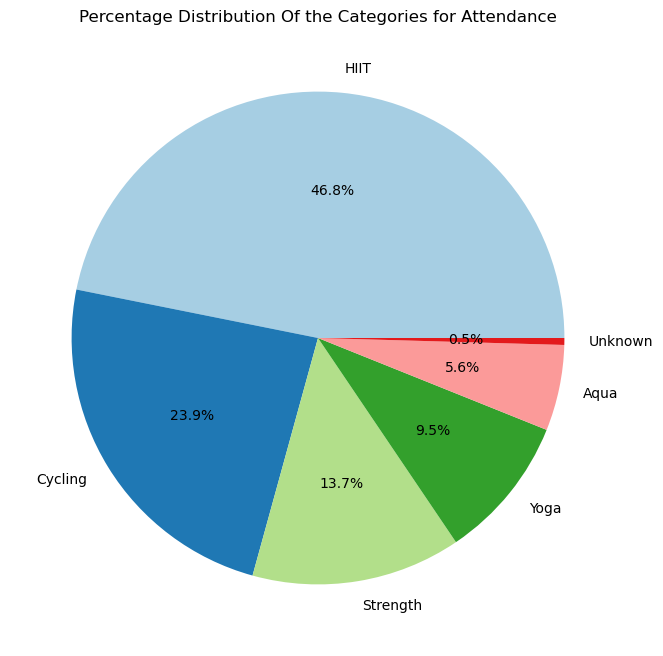

In [21]:
#add a pie chart to show that distribution of the category
category_values = attendance['category'].value_counts()

sorted_category_values= category_values.sort_values(ascending= False)

#Create pie chart
plt.figure(figsize=(8,8))
sns.set_palette("Paired")
plt.pie(sorted_category_values, labels= sorted_category_values.index, autopct='%1.1f%%')
plt.title('Percentage Distribution Of the Categories for Attendance')
plt.show()

The HIIT classes had the highest attendace rate of all the categories. Additionally, only 0.4% has not been recoreded to a category which should have no statistical siginificance on the model. Aqua classes had the lowest attendance rate of the recoreded classes.

The below code illustrated the percentage distribution of attended versus unattended classes. We see that the attendance rate is disporportionate with the highest percentage of 70% being help by unattendace.

In [22]:
#Sum the number of classes attended vs unattended
attended_count = (df['attended']==1).sum()
unattended_count= (df['attended']==0).sum()

#Find the percentages of attended versus unattended classes
attended_percentages= (attended_count /len(df['attended']))*100
unattended_percentages= (unattended_count /len(df['attended']))*100

#Print attendance & unattendance percentages
print(f'Percentage of attended classes:', attended_percentages)
print(f'Percentage of unattended classes:', unattended_percentages)

Percentage of attended classes: 30.101694915254235
Percentage of unattended classes: 69.89830508474576


70% if the dataset is not attending the classes

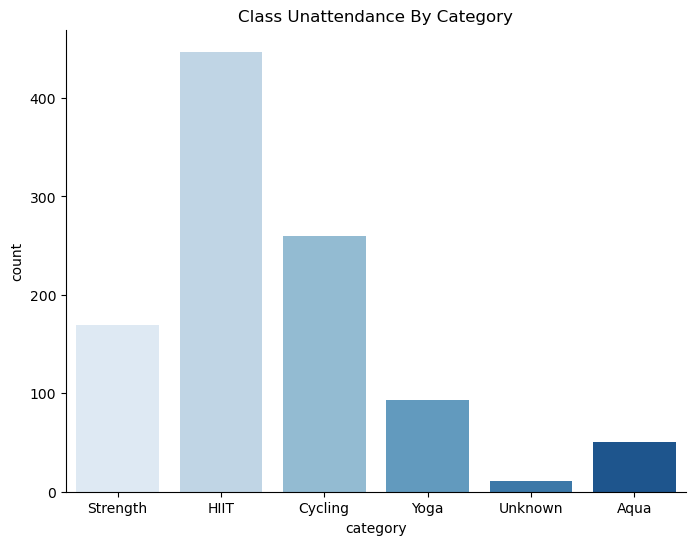

In [23]:
#Filter the dataset to classes with attendance
unattendance= df[df['attended'] == 0]

plt.figure(figsize=(8,6))
sns.countplot(data=unattendance, x= 'category', palette= 'Blues')
sns.despine()
plt.title("Class Unattendance By Category")
plt.show()


The following code shows the unattended rates for their respective categories

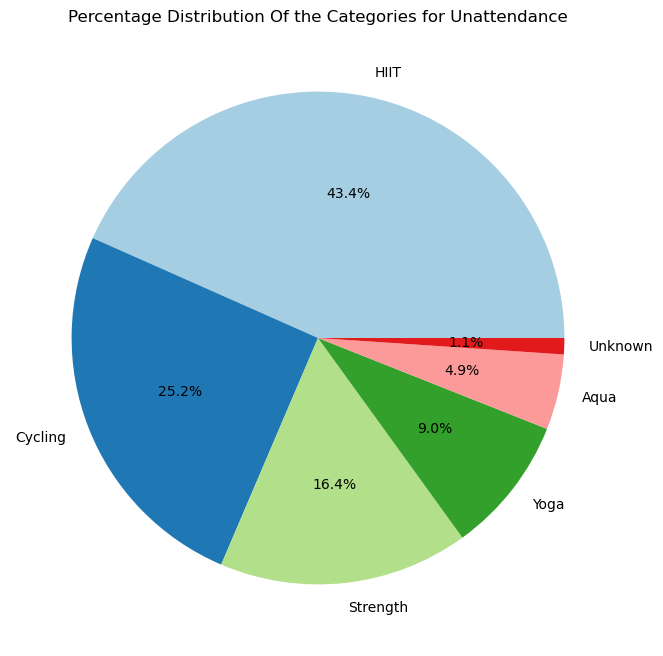

In [24]:
unattended_category_values = unattendance['category'].value_counts()

unattended_sorted_category_values= unattended_category_values.sort_values(ascending= False)

#Create pie char
plt.figure(figsize=(8,8))
sns.set_palette("Paired")
plt.pie(unattended_sorted_category_values, labels= unattended_sorted_category_values.index, autopct='%1.1f%%')
plt.title('Percentage Distribution Of the Categories for Unattendance')
plt.show()

**Summary Business Question 2**
There are several obseravtions that are supported by the data. Some of the observations include:
* HIIt and Cycling classes have the highest rate of attendance and non-attendace
* The data is not balanced across categories in the attended variable. HIIt clases take up almost 50% of the percentage distribution in both the unattended and attended variables.
* Approixmately 70% of the data is coming from unattendace(0)


**Business Question 3**
Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.

In [25]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


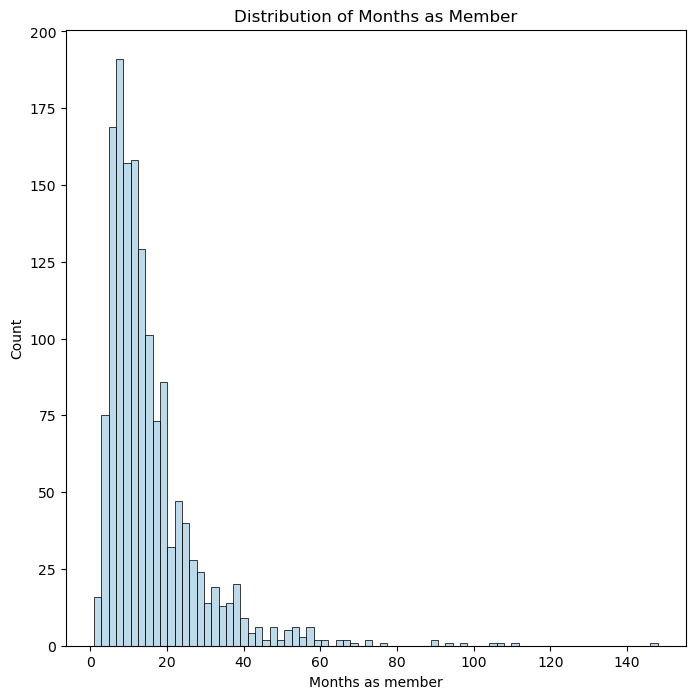

In [26]:
#Create a histplot, set labels and title
plt.figure(figsize=(8,8))
sns.histplot(data=df, x='months_as_member')
plt.xlabel('Months as member')
plt.ylabel('Count')
plt.title('Distribution of Months as Member')

#Show plot
plt.show()

**Summary of Business Question 3**
The distribution of the months are right skewed with most of the members having memberships between 0-20months. 
When the data is right-skewed, it means that the majority of the data points are concentrated towards the left or lower values, while the right or higher values have a longer tail. In addition, right skewed data also implies that:
* The mean is typically greater than the median.
* The tail of the distribution extends towards the higher values.
* The majority of the data points are located towards the lower values, with fewer data points in the higher range.
* The distribution is positively skewed.
When encountering skewed data, it is important to explore data transformations to help scale the data and reduce the likelihood of skewed results in the model



**Business question 4**
Describe the relationship between attendance and number of months as a member.
Your answer must include a visualization to demonstrate the relationship.



/tmp/ipykernel_20/4213374624.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')


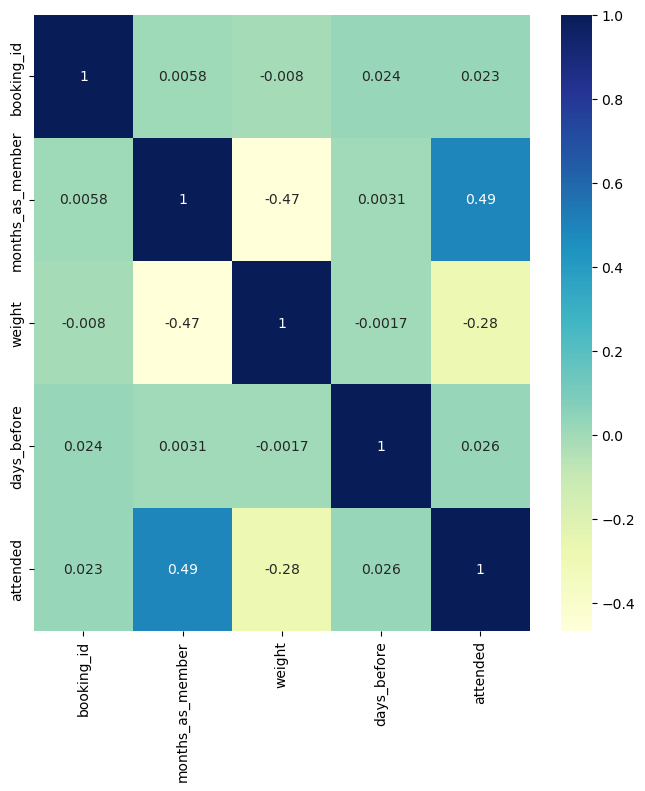

In [27]:
#Plotting a heatmap to look at the relationship between the variables
#To answer this business question we are looking at the relationship between 'month_as_member' & 'attended' columns

#Plotting the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')
plt.show()

**Summary of business question 4**
We use a heatmap to examine the relationship between the 'attended' and the 'month_as_member' variables. The results of the heatmap indicate that there is a .49 correlation coefficient between those variables. The range of correlation coefficients is between -1 and +1, where -1 represents a strong negative relationship, +1 represents a strong positive relationship, and 0 indicates no correlation. A coefficient of 0.49 indicates a moderate to moderately strong positive relationship, meaning that there is a tendency for the variables to increase or decrease together, but not necessarily in a perfectly linear manner. 


**Business question 5**
The business wants to predict whether members will attend using the data provided.
State the type of machine learning problem that this is (regression/ classification/
clustering).

**Answer**
The problem of predicting whether members will attend or not using the provided data is a classification problem in machine learning. Classification is a type of supervised learning problem where the goal is to predict the class or category of a given input based on its features. In this case, the goal is to predict whether a member will attend or not, which is a binary classification problem. By training a classification model on the available data, the model can learn patterns and relationships between the features and the class labels. 



The following code preesnts the answers for:

**Business question 6**
Fit a baseline model to predict whether members will attend using the data provided.
You must include your code.


The dataset df contains categorical variabels that must be conversted to numerical in order to build the ML model. We will use a one hot enoder to help convert the 'day_of_week column to numerical values in order to build the model.

In [28]:
#Inspecting the dtypes of the various columns. Will have to do some conversion of the dtyoes in order to fit the data into the models
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1475 non-null   int64  
 1   months_as_member  1475 non-null   int64  
 2   weight            1475 non-null   float64
 3   days_before       1475 non-null   int64  
 4   day_of_week       1475 non-null   object 
 5   time              1475 non-null   object 
 6   category          1475 non-null   object 
 7   attended          1475 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 103.7+ KB


In [29]:
#import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

#Intitialize the encoder
label_encoder= LabelEncoder()

#Fit and Transform the 'day_of_week' & time column
df['day_of_week']= label_encoder.fit_transform(df['day_of_week'])
df['time']= label_encoder.fit_transform(df['time'])

#Using the map function in order to set numerical variable for the class categories. This way we can reference which numerical value was assigned to which class.
df['category']= df['category'].map({'HIIT':1, 'Cycling':2, 'Strength':3, 'Aqua':4, 'Yoga':5,'Unknown':6})

#Extracting the numerical part of the strings using strnog manipulation to help convert the 'days_before' column to an integer dtype
#df['days_before']= df['days_before'].str.extract('(\d+)').astype('int')


In [30]:
df.isna().mean()

booking_id          0.0
months_as_member    0.0
weight              0.0
days_before         0.0
day_of_week         0.0
time                0.0
category            0.0
attended            0.0
dtype: float64

In [31]:
#Looking for negative values. This string od code would help detect abnormalities in the recorded data, for example, we cannot have a negative weight
has_negative= np.any(df < 0)

if has_negative:
    print("The data contains negative values.")
else:
    print("The data does not contain negative values.")

The data does not contain negative values.


In [32]:
#Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into features (X) & target variable (y)
X= df.drop('attended', axis= 1).values
y= df['attended'].values

#Train-test split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
model_knn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()

# Define the parameter grids for each model
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_lr = {'C': [0.1, 1, 10]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}

# Perform grid search cross-validation for KNN
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)
best_model_knn = grid_search_knn.best_estimator_

# Perform grid search cross-validation for Logistic Regression
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train_scaled, y_train)
best_model_lr = grid_search_lr.best_estimator_

# Perform grid search cross-validation for Random Forest
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)
best_model_rf = grid_search_rf.best_estimator_

#Initialize the bagging classifier with the best models
bagging_knn = BaggingClassifier(base_estimator=best_model_knn, n_estimators=10)
bagging_lr = BaggingClassifier(base_estimator=best_model_lr, n_estimators=10)
bagging_rf = BaggingClassifier(base_estimator=best_model_rf, n_estimators=10)

# Fit the bagging classifiers
bagging_knn.fit(X_train_scaled, y_train)
bagging_lr.fit(X_train_scaled, y_train)
bagging_rf.fit(X_train_scaled, y_train)

# Predict on the scaled test data using the bagging classifiers
y_pred_bagging_knn = bagging_knn.predict(X_test_scaled)
y_pred_bagging_lr = bagging_lr.predict(X_test_scaled)
y_pred_bagging_rf = bagging_rf.predict(X_test_scaled)

# Calculate accuracy
accuracy_bagging_knn = accuracy_score(y_test, y_pred_bagging_knn)
accuracy_bagging_lr = accuracy_score(y_test, y_pred_bagging_lr)
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)


# Predict on the scaled test data using the best models
#y_pred_knn = best_model_knn.predict(X_test_scaled)
#y_pred_lr = best_model_lr.predict(X_test_scaled)
#y_pred_rf = best_model_rf.predict(X_test_scaled)

# Calculate accuracy <- This also answers question 7 and shows the comparison of the models
#accuracy_knn = accuracy_score(y_test, y_pred_knn)
#accuracy_lr = accuracy_score(y_test, y_pred_lr)
#accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the results
#print(f"Best KNN model accuracy: {accuracy_knn:.2f}")
#print(f"Best Logistic Regression model accuracy: {accuracy_lr:.2f}")
#print(f"Best Random Forest model accuracy: {accuracy_rf:.2f}")
print(f"Bagging KNN model accuracy: {accuracy_bagging_knn:.2f}")
print(f"Bagging Logistic Regression model accuracy: {accuracy_bagging_lr:.2f}")
print(f"Bagging Random Forest model accuracy: {accuracy_bagging_rf:.2f}")

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging KNN model accuracy: 0.74
Bagging Logistic Regression model accuracy: 0.79
Bagging Random Forest model accuracy: 0.77


***Buisness question 7****
Fit a comparison model to predict whether members will attend using the data
provided. You must include your code.


Below displays a boxplot for visul comparison of the performance of the models. 

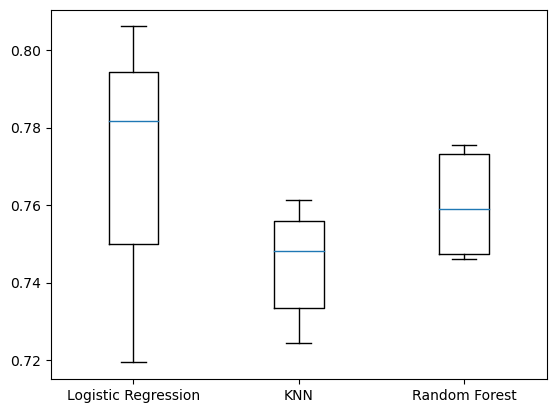

In [33]:
#Model dictionaries
models= {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(n_neighbors= 5),
        "Random Forest": RandomForestClassifier(n_estimators=100)}
results= []
for model in models.values():
    kf= KFold(n_splits=6, random_state=42, shuffle= True)
    cv_results= cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
    
plt.boxplot(results, labels= models.keys())
plt.show()

**Summary of business question 6 & 7**
Here we created a baseline for our model to predict on based on the information in the dataset. Before we built our model, we had to to perform a series of manipulation on the dataset in order to create the baseline. 


Here are some bullet notations of techniques applied to the dataset:
**Preprocessing**
* Preprocessing of the data was crucial as there was a mixture of string and numeric data. For any ML model to be built, the data must possess numeric data types and thus we had to use a Label Encoder in order to change the data types to numerical values. The encoder encoded the string type of the 'days_of_week' to numeric codes, example, Sun was encoded as 0, Mon-1, Tues-2 etc. Remember that in python, the fisrt value in the count is zero(0) and NOT(1) like in natural language. The same technique was applied to the 'time' column, where 'AM' was recorded as 0 and 'PM' as 1.
* Mapping was used to map numerical values to the category column for the various classes. This was done this was to keep better track as to what value was attribution to what class. Using the LabelEncoder would not clearly define which numerical value was assigned to which class and would have created issues in understanding the predictions in the model as we would not have been able to keep track of which number represents what class.
* String extraction was used on the 'days_before' column to remove the 'days' string that was recorded in the column. In addition, the column was converted to umerical values using the numpy .astype method.

**Scaling data**
The data in the dataset carried skewed values such as in the 'months_as_member column where the data was heavily right skewed. Skewed data could impact the accuracy of the model and thus the data was scaled to help:
**Standardization of Features:** Scaling brings the features to a similar scale, ensuring that they are on a comparable level. This is particularly important when features have different measurement units or scales. Scaling helps avoid bias towards features with higher magnitudes during model training.
**Improved Model Performance:** Scaling can improve the performance and convergence of many machine learning algorithms. Some algorithms, such as K-nearest neighbors (KNN) and support vector machines (SVM), are sensitive to the scale of the features. Scaling ensures that all features contribute equally to the model's learning process.
**Gradient Descent Optimization:** In optimization algorithms that involve gradient descent, such as linear regression and neural networks, scaling can speed up convergence. Scaling the features helps the algorithm take larger steps towards the minimum and reduces the likelihood of getting stuck in local optima.
**Regularization Effects:** Regularization techniques, such as L1 or L2 regularization, penalize large coefficients. Scaling the features prevents certain features from dominating the regularization term, allowing regularization to work more effectively.
**Interpretability:** Scaling the features can make the coefficients or feature importance values more interpretable. When features are on a similar scale, it becomes easier to compare the relative importance of different features in the model.

Bagging Method: The ensemble methid was applied to the baseline because it improves the performance, stability, and robustness of machine learning models. It is particularly effective in reducing variance, improving generalization, and increasing accuracy. By combining the predictions of multiple models, bagging can enhance the reliability and consistency of the final predictions. In addition, this method was used to try to mitigate the effects of class imbalance in the model; in our exploratory analysis (answere to business question two) we observed that 70% of the data in the 'attended' column(the target variable) was attributed to unattendance whereas only 30% of the variables in the column were recorded as attendance.

**Target Variable**
The objective of the model is to predict class attendance and thus the 'attended' variable was used as the target variable of the model.

**Hyperparameter Tuning**
 Hyperparameters control the behavior of the models, and fine-tuning them can improve their performance. This feature is part of the resason the KNN model(amongst the others) were chosen as one of the classifiation models to predict on the dataset. The initial creation of the model generated the same accuracy score for all three models, the models required fine-tuning of their hyperparameters to achieve better performance.
 
 In conclusion, the Logistic Regressor and Random Forset models performed the best as with accuracy scores of 76% and 78% respectively.


**Business question 8**
Explain why you chose the two models used in parts 6 and 7. 

I chose the Logistic Regressor and the Random Forest models because they produce the results with the highest accuracy score. In addition, the Logistic Regressor has the added benefit of feature importance should we want to done more analysis as to what are the most importance features in the dataset. 

**Business question 9**
Compare the performance of the two models used in parts 6 and 7, using any method
suitable. You must include your code.

In [34]:
# Initialize the models
model_knn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()

#Fit the models
# Fit the model with the training data
model_knn.fit(X_train, y_train)
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)


y_pred_knn= model_knn.predict(X_test)
y_pred_lr= model_lr.predict(X_test)
y_pred_rf= model_rf.predict(X_test)

#Calcualte evaluation metrics KNN
precision_knn= precision_score(y_test, y_pred_knn)
recall_knn= recall_score(y_test, y_pred_knn)
f1_score_knn= f1_score(y_test, y_pred_knn)


#Calcualte evaluation metrics Logistic Regressor
precision_lr= precision_score(y_test, y_pred_lr)
recall_lr= recall_score(y_test, y_pred_lr)
f1_score_lr= f1_score(y_test, y_pred_lr)

#Calcualte evaluation metrics Random Forest
precision_rf= precision_score(y_test, y_pred_rf)
recall_rf= recall_score(y_test, y_pred_rf)
f1_score_rf= f1_score(y_test, y_pred_rf)

#Print the evaluation metrics for comparison
#KNN
print("These are the scores fot the KNN Model")
print('Precision:', precision_knn)
print('Recall:', recall_knn)
print('F1-score:', f1_score_knn)
print()

#Print the evaluation metrics for comparison
#Logistic Regressor
print("These are the scores fot the LR Model")
print('Precision:', precision_lr)
print('Recall:', recall_lr)
print('F1-score:', f1_score_lr)
print()

#Print the evaluation metrics for comparison
#Random Forest
print("These are the scores fot the RF Model")
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_score_rf)
print()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


These are the scores fot the KNN Model
Precision: 0.6140350877192983
Recall: 0.40229885057471265
F1-score: 0.48611111111111116

These are the scores fot the LR Model
Precision: 0.7083333333333334
Recall: 0.39080459770114945
F1-score: 0.5037037037037037

These are the scores fot the RF Model
Precision: 0.6617647058823529
Recall: 0.5172413793103449
F1-score: 0.5806451612903225



#Improving the recall values to reduce the percentage of False Negatives

In [35]:
from imblearn.over_sampling import SMOTE

# Initialize the models
model_knn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the models using resampled data
model_knn.fit(X_train_resampled, y_train_resampled)
model_lr.fit(X_train_resampled, y_train_resampled)
model_rf.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_knn = model_knn.predict(X_test)
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Calculate evaluation metrics for KNN
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

# Calculate evaluation metrics for Logistic Regression
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)

# Calculate evaluation metrics for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics for comparison
print("These are the scores for the KNN Model with SMOTE")
print('Precision:', precision_knn)
print('Recall:', recall_knn)
print('F1-score:', f1_score_knn)
print()

print("These are the scores for the LR Model with SMOTE")
print('Precision:', precision_lr)
print('Recall:', recall_lr)
print('F1-score:', f1_score_lr)
print()

print("These are the scores for the RF Model with SMOTE")
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_score_rf)
print()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


These are the scores for the KNN Model with SMOTE
Precision: 0.4918032786885246
Recall: 0.6896551724137931
F1-score: 0.5741626794258372

These are the scores for the LR Model with SMOTE
Precision: 0.5922330097087378
Recall: 0.7011494252873564
F1-score: 0.6421052631578947

These are the scores for the RF Model with SMOTE
Precision: 0.5581395348837209
Recall: 0.5517241379310345
F1-score: 0.5549132947976879



## Task 10
**Business question 10* Explain which model performs better and why

The Logistic Regression Model(LR) performs the best because it has the highest accuracy(business question 6) as well as the best precision, f1 score and recall(business question 10). These metrics are important as beacuse:

**Recall:** Also known as sensitivity or true positive rate, is a performance metric that measures the proportion of actual positive samples that are correctly identified as positive by the model. The LR of the other three models predicted accurately 70% of the time as compared to the Random Forest and the KNN model(57% & 69% respectively)

**F1-score** The F1 score takes into account both the precision (the proportion of true positive predictions out of all positive predictions) and recall (the proportion of true positive predictions out of all actual positive samples). It balances the trade-off between these two metrics and provides a single score to assess the model's overall performance. The Random Forest had an F1 score of 59% compared to the Logistic Regressor and the KNN(65% & 57% respectively).

**Precision** 
Precision is an important metric because it provides insights into the model's ability to make accurate positive predictions. Precision measures the proportion of true positive predictions out of all positive predictions made by the model. Presicion is an important to know especially when the data may be imbalanced. This means that one class (usually the minority class) has significantly fewer samples than the other class. In such cases, accuracy alone can be misleading. Precision focuses specifically on the positive class, allowing us to evaluate the model's ability to correctly identify positive samples without being affected by the class imbalance. The LR and RF models had equal precision of 61% while the KNN scored 49%. 

**Accuracy**
Model accuracy is an important metric in machine learning because it provides a measure of overall correctness or success rate of the model's predictions. Accuracy calculates the proportion of correct predictions out of the total number of predictions made by the model. However, it's important to note that accuracy may not always be the most suitable metric, particularly in scenarios with imbalanced classes or when the costs of false positives and false negatives are significantly different. In such cases, precision, recall, or other domain-specific metrics may be more informative and appropriate. Therefore, it's essential to consider alongside other evaluation metrics to gain a comprehensive understanding of the model's performance and make informed decisions.


Overall, the LR has the best performance in all four metrics compared to the other models. This suggests that is would be the best model to use for predicting class attendance vs unattendace.
* High accuracy 79%
* 70% on recall
* 61% on precision
* 65% on the f1 score





